In [9]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont, ImageOps
import os

In [10]:
discordBlue = '#7289da'
discordWhite = '#ffffff'
discordGray = '#99aab5'
discordDarkGray = '#2c2f33'
discordBlack = '#23272a'
discordBackground = '#36393e'
enemyRing = '#990000'
playerRing = '#000099'
allyRing = '#aaaa00'

In [11]:
icons = {}
icons[0] = 'blank'
icons[1] = 'square'
icons[2] = 'Xelophehod'
icons[3] = 'Subotai'
icons[4] = 'Chahil'
icons[5] = 'Goblin'

enemies = ['Xelophehod', 'Goblin']
players = ['Subotai']
allies = ['Chahil']

In [12]:
def HexagonArray(lengthSquares=12):
    dataArray = np.zeros((lengthSquares,lengthSquares))
    dataArray[len(dataArray)//2] = 1
    dataArray[len(dataArray)//2-(1-len(dataArray)%2)] = 1
    for row in range(1,len(dataArray)//2-(1-len(dataArray)%2)):
        difference = (len(dataArray)//2-(1-len(dataArray)%2)) - row
        dataArray[row][int(np.ceil(difference/2)):-int(np.ceil(difference/2))] = [1]
    for row in range(len(dataArray)//2+(len(dataArray)%2), len(dataArray)-1):
        difference = row - len(dataArray)//2
        dataArray[row][int(np.ceil(difference/2)):-int(np.ceil(difference/2))] = 1
    return dataArray

In [13]:
def RectangleArray(widthSquares=12, heightSquares=6):
    dataArray = np.ones((heightSquares, widthSquares))
    return dataArray

In [14]:
def RectangleImage(widthSquares=12, heightSquares=6, backgroundColor=discordDarkGray, gridColor=discordGray, scaling=100):
    width = widthSquares*scaling
    height = heightSquares*scaling
    image = Image.new(mode='RGB', size=(width, height), color=gridColor)
    drawer = ImageDraw.Draw(image)
    drawer.polygon((0, 0, width-1, 0, width-1, height-1, 0, height-1), outline='black', fill=gridColor)
    return image

In [15]:
def HexagonImage(lengthSquares=12, backgroundColor=discordDarkGray, gridColor=discordGray, scaling=100):
    image = Image.new(mode='RGB', size=(lengthSquares*scaling,lengthSquares*scaling), color=backgroundColor)
    drawer = ImageDraw.Draw(image)
    length=(lengthSquares*scaling)//2-1
    c60 = np.cos(np.pi/3)
    s60 = np.sin(np.pi/3)
    drawer.polygon((0,length,length*c60, length-(length*s60), length*(1+c60), length-(length*s60), 2*length, length, length*(1+c60), length+(length*s60), length*c60, length+(length*s60)), outline='black', fill=gridColor)
    return image

In [16]:
def GridFromArray(dataArray, image, color=discordDarkGray, scaling=100):
    drawer = ImageDraw.Draw(image)
    mask = Image.new('L', (80,80), 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0,0,80,80), fill=255)
    for row in range(len(dataArray)):
        for column in range(len(dataArray[row])):
            value = int(dataArray[row][column])
            if(icons[value] != 'blank'):
                drawer.line((column*scaling, row*scaling, column*scaling, ((row+1)*scaling)), fill=color, width=1)
                drawer.line((column*scaling, row*scaling, (column+1)*scaling, row*scaling), fill=color, width=1)
                drawer.line(((column+1)*scaling, row*scaling, (column+1)*scaling, ((row+1)*scaling)), fill=color, width=1)
                drawer.line((column*scaling, (row+1)*scaling, (column+1)*scaling, ((row+1)*scaling)), fill=color, width=1)
            if(column == len(dataArray[row])-1 and icons[value] != 'blank'):
                drawer.line(((column+1)*scaling-1, row*scaling, (column+1)*scaling-1, ((row+1)*scaling)), fill=color, width=1)
            if(row == len(dataArray)-1 and icons[value] != 'blank'):
                drawer.line((column*scaling, (row+1)*scaling-1, (column+1)*scaling, (row+1)*scaling-1), fill=color, width=1)
            if(value > 1 and value in icons):
                #drawer.ellipse((column*scaling+1, row*scaling+1, (column+1)*scaling-1, (row+1)*scaling-1), fill='black')
                ringColor = 'gray'
                if(icons[value] in enemies):
                    ringColor = enemyRing
                elif(icons[value] in players):
                    ringColor = playerRing
                elif(icons[value] in allies):
                    ringColor = allyRing
                drawer.ellipse((column*scaling+3, row*scaling+1, (column+1)*scaling-1, (row+1)*scaling-3), fill=ringColor)
                #drawer.ellipse((column*scaling+8, row*scaling+8, (column+1)*scaling-8, (row+1)*scaling-8), fill='black')
                image.paste(Image.open('./Images/NPCs/{}.png'.format(icons[value])).resize((scaling-20,scaling-20)), (column*scaling+10, row*scaling+10, (column+1)*scaling-10, (row+1)*scaling-10), mask)
                
    return image

In [17]:
def LabelGrid(inputImage, widthSquares=12, heightSquares=12):
    scalingWidth = int(inputImage.width/widthSquares)
    scalingHeight = int(inputImage.height/heightSquares)
    fontSizeWidth = scalingWidth//2
    fontSizeHeight = scalingHeight//2

    fontWidth = ImageFont.truetype('consola.ttf', fontSizeWidth)
    fontHeight = ImageFont.truetype('consola.ttf', fontSizeHeight)
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    outputImage = Image.new('RGBA', (inputImage.width+scalingWidth, inputImage.height+scalingHeight))
    gridDraw = ImageDraw.Draw(outputImage)
    outputImage.paste(inputImage, (fontSizeWidth, fontSizeHeight))
    for square in range(widthSquares):
        gridDraw.text((square*scalingWidth+(scalingWidth/2)-(fontSizeWidth/2+1)+fontSizeWidth, -1), '{}'.format(alphabet[square]), fill='black', font=fontWidth)
        gridDraw.text((square*scalingWidth+(scalingWidth/2)-(fontSizeWidth/2-1)+fontSizeWidth, 1), '{}'.format(alphabet[square]), fill='black', font=fontWidth)
        gridDraw.text((square*scalingWidth+(scalingWidth/2)-(fontSizeWidth/2+1)+fontSizeWidth, 1), '{}'.format(alphabet[square]), fill='black', font=fontWidth)
        gridDraw.text((square*scalingWidth+(scalingWidth/2)-(fontSizeWidth/2-1)+fontSizeWidth, -1), '{}'.format(alphabet[square]), fill='black', font=fontWidth)

        gridDraw.text((square*scalingWidth+(scalingWidth/2)-(fontSizeWidth/2)+fontSizeWidth, 0), '{}'.format(alphabet[square]), fill='white', font=fontWidth)
        
        gridDraw.text((square*scalingWidth+(scalingWidth/2)-(fontSizeWidth/2+1)+fontSizeWidth, inputImage.height+scalingHeight/2-1), '{}'.format(alphabet[square]), fill='black', font=fontWidth)
        gridDraw.text((square*scalingWidth+(scalingWidth/2)-(fontSizeWidth/2-1)+fontSizeWidth, inputImage.height+scalingHeight/2+1), '{}'.format(alphabet[square]), fill='black', font=fontWidth)
        gridDraw.text((square*scalingWidth+(scalingWidth/2)-(fontSizeWidth/2+1)+fontSizeWidth, inputImage.height+scalingHeight/2+1), '{}'.format(alphabet[square]), fill='black', font=fontWidth)
        gridDraw.text((square*scalingWidth+(scalingWidth/2)-(fontSizeWidth/2-1)+fontSizeWidth, inputImage.height+scalingHeight/2-1), '{}'.format(alphabet[square]), fill='black', font=fontWidth)

        gridDraw.text((square*scalingWidth+(scalingWidth/2)-(fontSizeWidth/2)+fontSizeWidth, inputImage.height+scalingHeight/2), '{}'.format(alphabet[square]), fill='white', font=fontWidth)
    for square in range(heightSquares):
        gridDraw.text((-1, square*scalingHeight+(scalingHeight/2)-(fontSizeHeight/2+1)+fontSizeHeight), '{}'.format(square+1), fill='black', font=fontHeight)
        gridDraw.text((1, square*scalingHeight+(scalingHeight/2)-(fontSizeHeight/2-1)+fontSizeHeight), '{}'.format(square+1), fill='black', font=fontHeight)
        gridDraw.text((1, square*scalingHeight+(scalingHeight/2)-(fontSizeHeight/2+1)+fontSizeHeight), '{}'.format(square+1), fill='black', font=fontHeight)
        gridDraw.text((-1, square*scalingHeight+(scalingHeight/2)-(fontSizeHeight/2-1)+fontSizeHeight), '{}'.format(square+1), fill='black', font=fontHeight)
    
        gridDraw.text((0, square*scalingHeight+(scalingHeight/2)-(fontSizeHeight/2)+fontSizeHeight), '{}'.format(square+1), fill='white', font=fontHeight)
        
        gridDraw.text((inputImage.width+scalingWidth/2-1, square*scalingHeight+(scalingHeight/2)-(fontSizeHeight/2+1)+fontSizeHeight), '{}'.format(square+1), fill='black', font=fontHeight)
        gridDraw.text((inputImage.width+scalingWidth/2+1, square*scalingHeight+(scalingHeight/2)-(fontSizeHeight/2-1)+fontSizeHeight), '{}'.format(square+1), fill='black', font=fontHeight)
        gridDraw.text((inputImage.width+scalingWidth/2+1, square*scalingHeight+(scalingHeight/2)-(fontSizeHeight/2+1)+fontSizeHeight), '{}'.format(square+1), fill='black', font=fontHeight)
        gridDraw.text((inputImage.width+scalingWidth/2-1, square*scalingHeight+(scalingHeight/2)-(fontSizeHeight/2-1)+fontSizeHeight), '{}'.format(square+1), fill='black', font=fontHeight)
    
        gridDraw.text((inputImage.width+scalingWidth/2, square*scalingHeight+(scalingHeight/2)-(fontSizeHeight/2)+fontSizeHeight), '{}'.format(square+1), fill='white', font=fontHeight)
    return outputImage

In [18]:
class Grid:
    def __init__(self, shape='rectangle', width=12, height=12, scaling=100, backgroundColor=discordDarkGray, gridColor=discordGray):
        self.shape = shape
        self.width = width
        self.height = height
        self.scaling = scaling
        self.backgroundColor = backgroundColor
        self.gridColor = gridColor
        if(self.shape == 'rectangle'):
            self.data = RectangleArray(self.width, self.height)
            self.image = LabelGrid(GridFromArray(self.data, RectangleImage(self.width, self.height, self.backgroundColor, self.gridColor, self.scaling), scaling=self.scaling), self.width, self.height)
        elif(self.shape == 'hexagon'):
            self.data = HexagonArray(self.width)
            self.image = LabelGrid(GridFromArray(self.data, HexagonImage(self.width, self.backgroundColor, self.gridColor, self.scaling), scaling=self.scaling), self.width, self.height)
        else:
            self.data = np.zeros((height,width))
            self.image = LabelGrid(GridFromArray(self.data, RectangleImage(self.width, self.height, self.backgroundColor, self.gridColor, self.scaling), scaling=self.scaling), self.width, self.height)
    def __repr__(self):
        return self.data

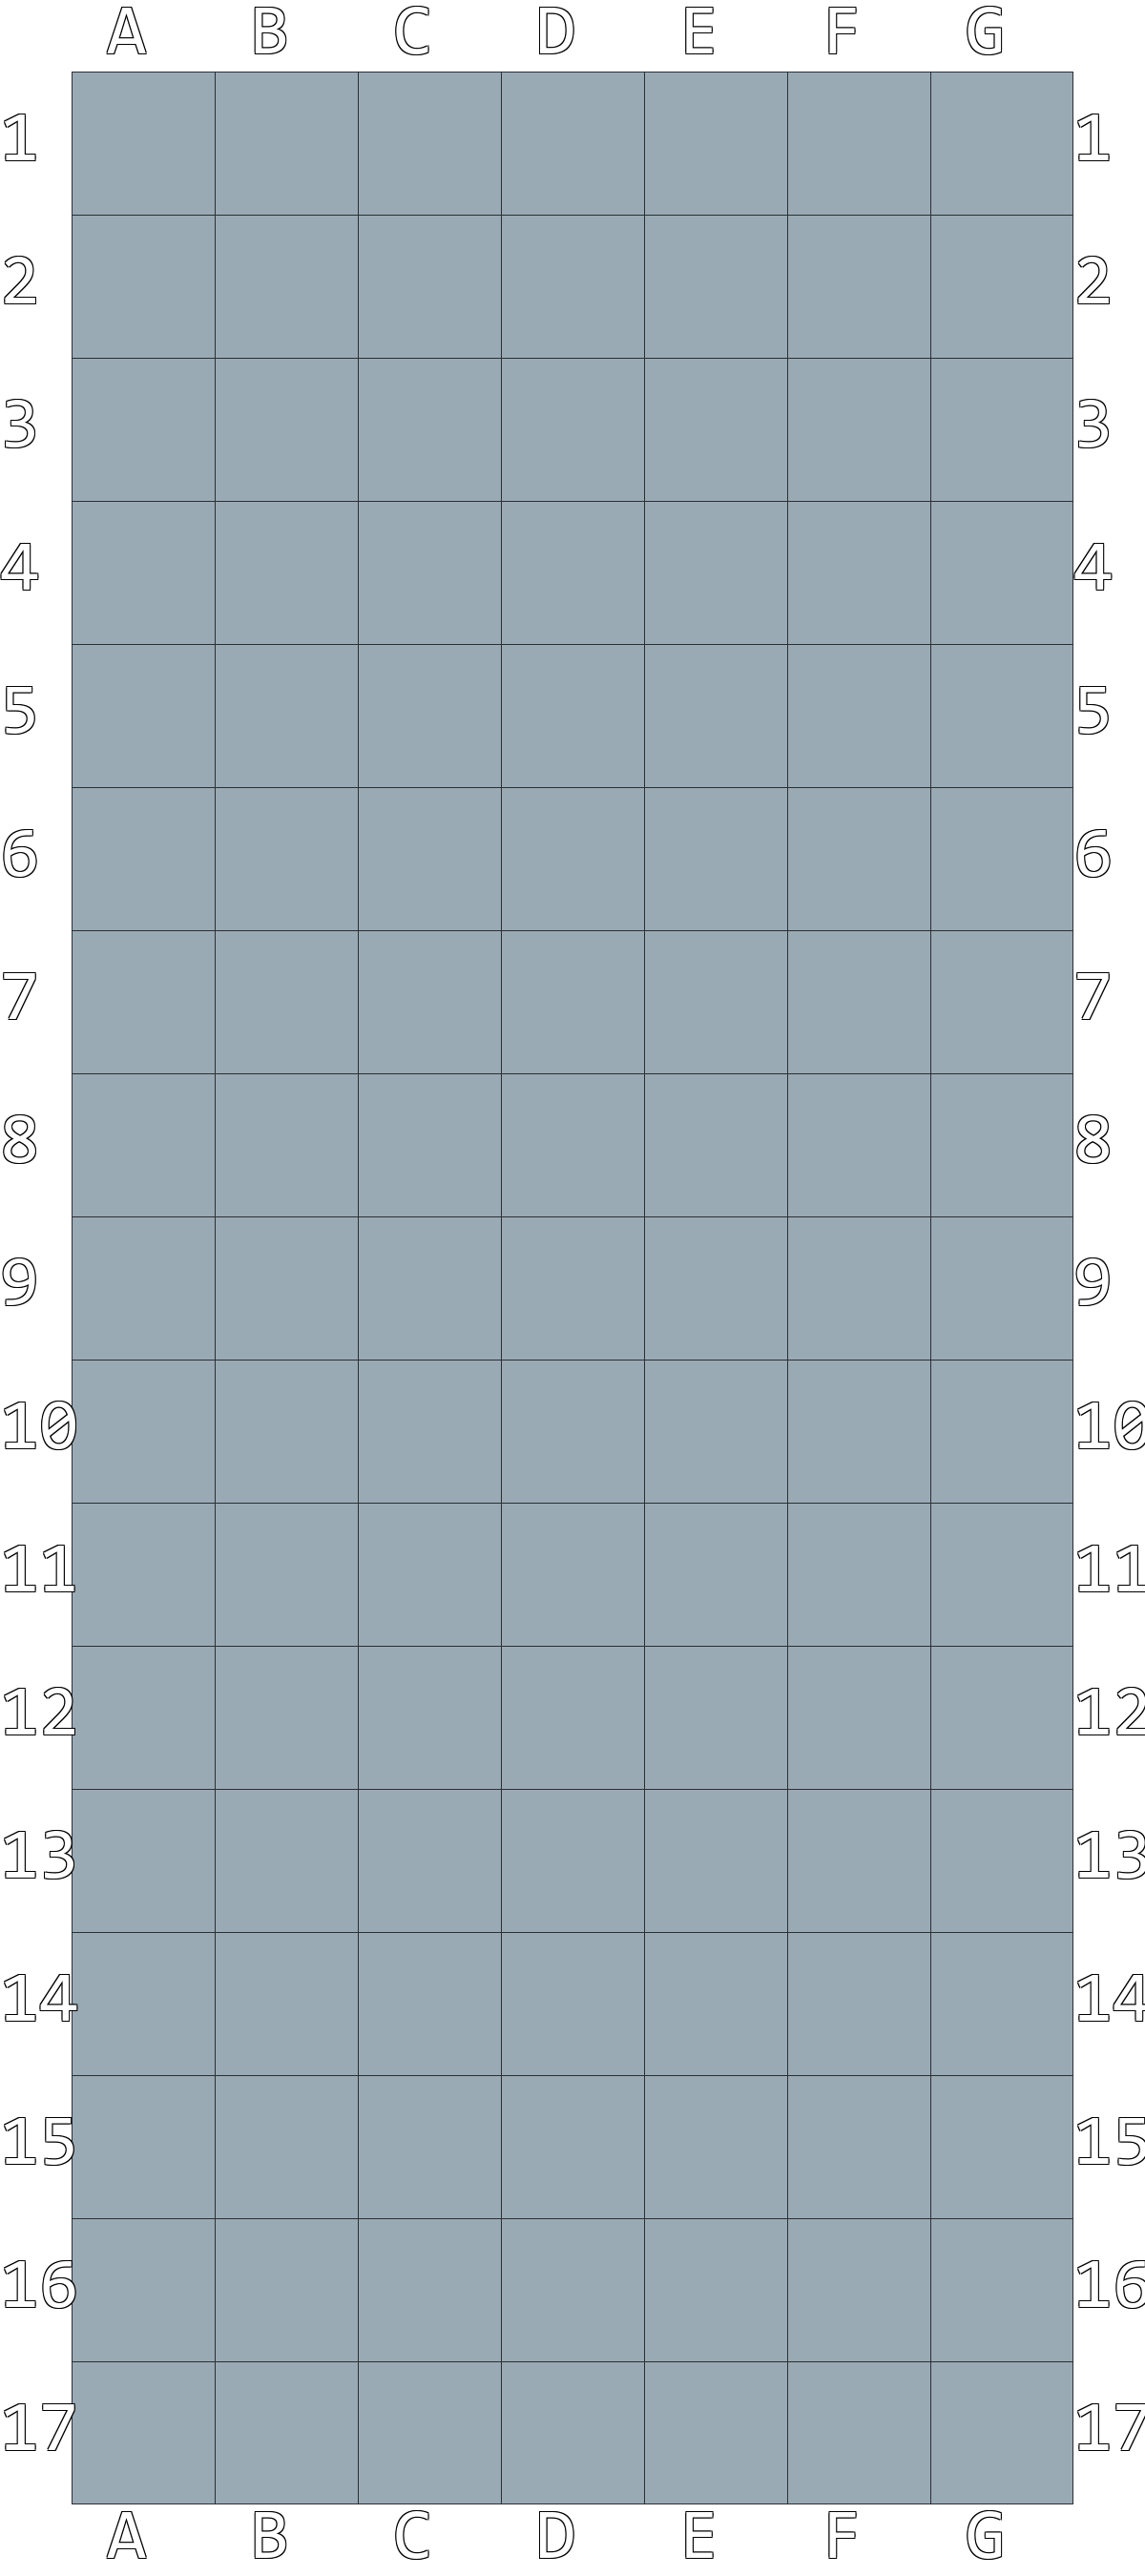

In [19]:
Grid('rectangle', width=7, height=17, scaling=150).image

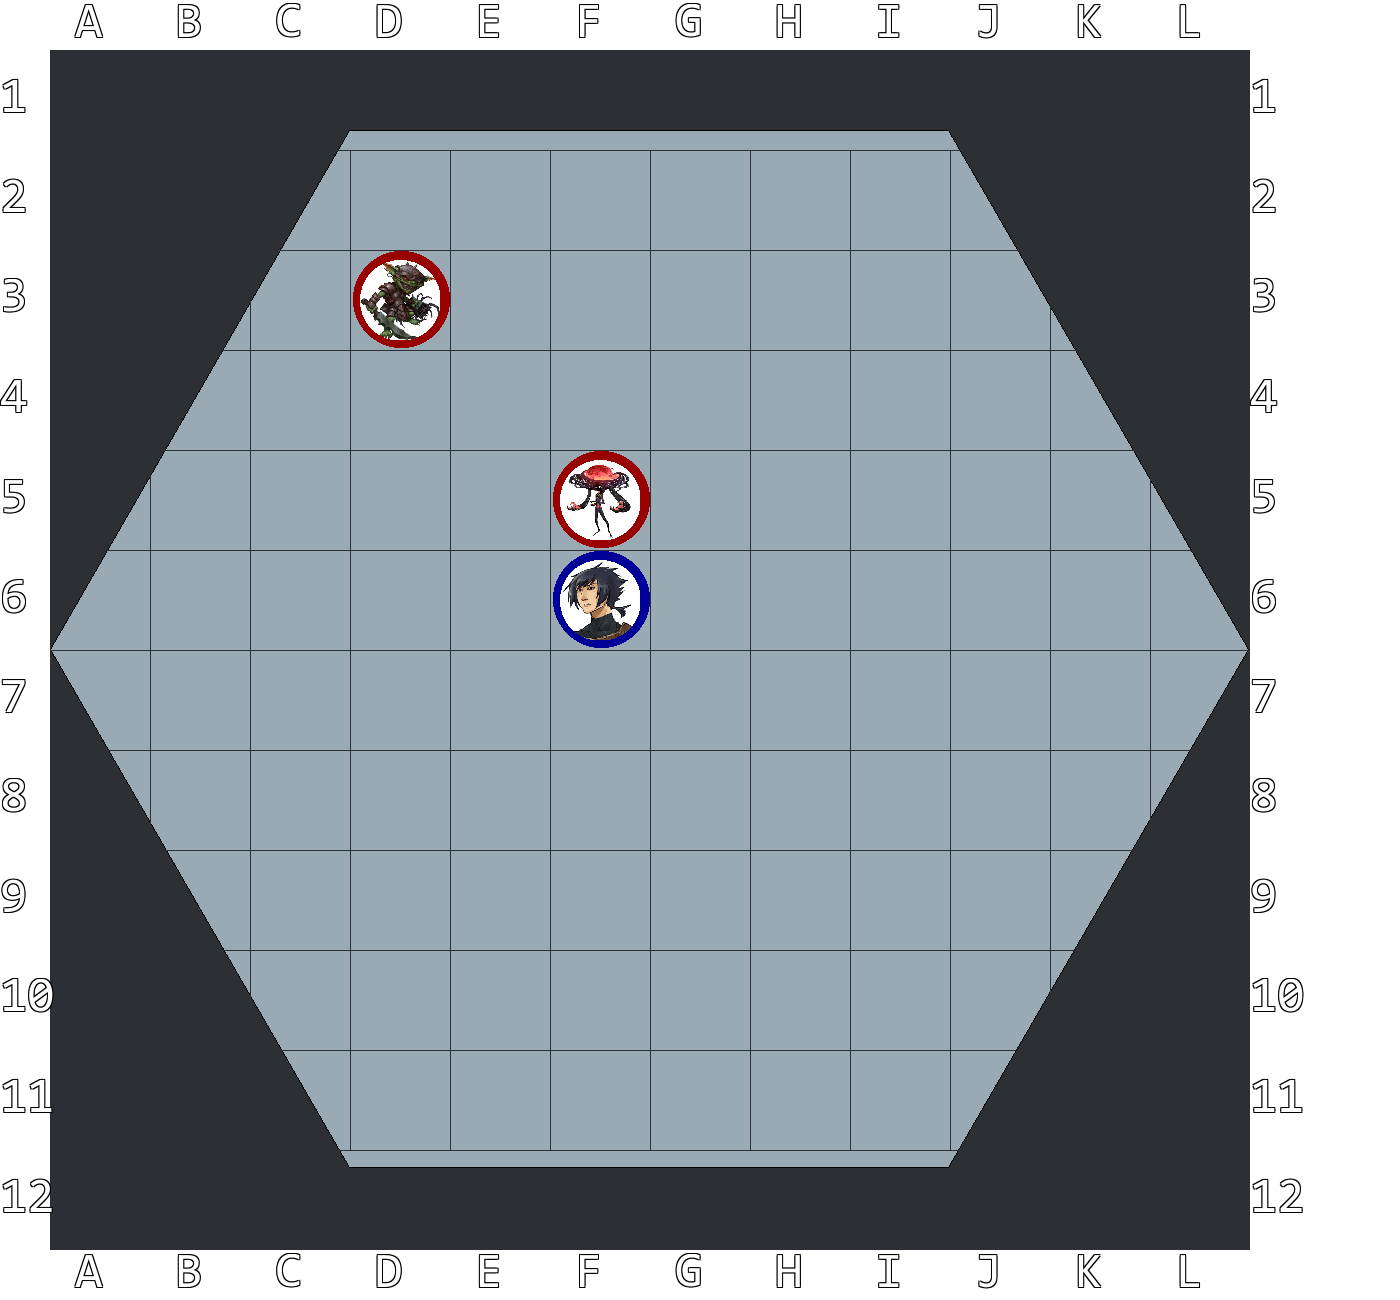

In [23]:
data = HexagonArray()
data[4][5] = 2
data[5][5] = 3
data[2][3] = 5
grid = GridFromArray(data, HexagonImage())
LabelGrid(grid)

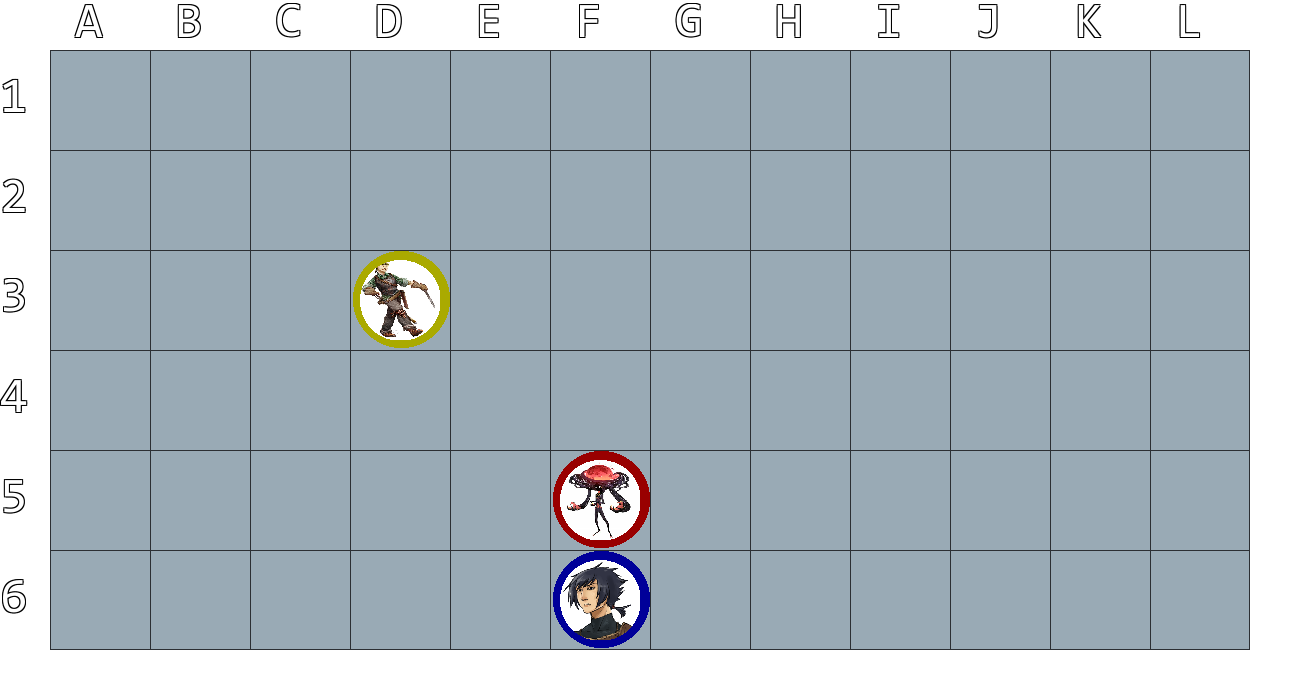

In [13]:
data = RectangleArray()
data[4][5] = 2
data[5][5] = 3
data[2][3] = 4
grid = GridFromArray(data, RectangleImage())
LabelGrid(grid, 12, 6)

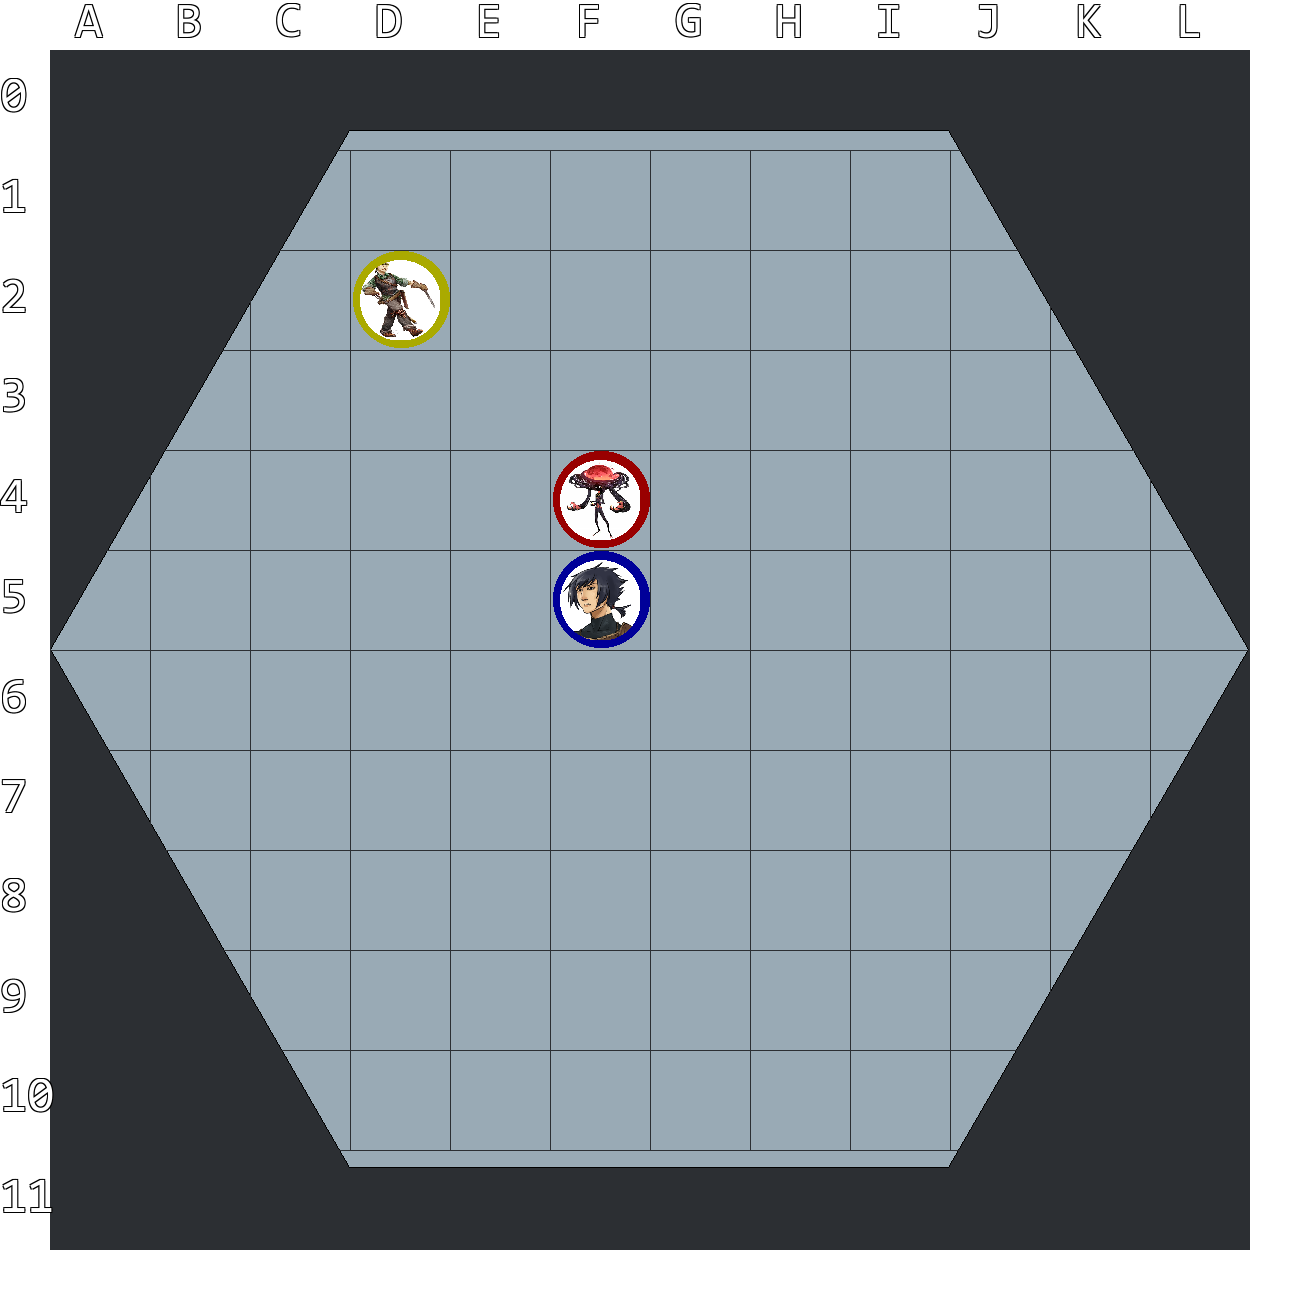

In [14]:
scaling = 100
fontSize = 50
size = 12
data = HexagonArray()
data[4][5] = 2
data[5][5] = 3
data[2][3] = 4
grid = GridFromArray(data, HexagonImage())
im = Image.new('RGBA', (grid.width+100, grid.height+100))
im.paste(grid, (fontSize,fontSize))
gridDraw = ImageDraw.Draw(im)
calibri = ImageFont.truetype('consola.ttf', fontSize)
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
for square in range(12):
    gridDraw.text((square*scaling+(scaling/2)-(fontSize/2+1)+fontSize, -1), '{}'.format(alphabet[square]), fill='black', font=calibri)
    gridDraw.text((square*scaling+(scaling/2)-(fontSize/2-1)+fontSize, 1), '{}'.format(alphabet[square]), fill='black', font=calibri)
    gridDraw.text((square*scaling+(scaling/2)-(fontSize/2+1)+fontSize, 1), '{}'.format(alphabet[square]), fill='black', font=calibri)
    gridDraw.text((square*scaling+(scaling/2)-(fontSize/2-1)+fontSize, -1), '{}'.format(alphabet[square]), fill='black', font=calibri)

    gridDraw.text((square*scaling+(scaling/2)-(fontSize/2)+fontSize, 0), '{}'.format(alphabet[square]), fill='white', font=calibri)
    
    gridDraw.text((-1, square*scaling+(scaling/2)-(fontSize/2+1)+fontSize), '{}'.format(square), fill='black', font=calibri)
    gridDraw.text((1, square*scaling+(scaling/2)-(fontSize/2-1)+fontSize), '{}'.format(square), fill='black', font=calibri)
    gridDraw.text((1, square*scaling+(scaling/2)-(fontSize/2+1)+fontSize), '{}'.format(square), fill='black', font=calibri)
    gridDraw.text((0-1, square*scaling+(scaling/2)-(fontSize/2-1)+fontSize), '{}'.format(square), fill='black', font=calibri)
    
    gridDraw.text((0, square*scaling+(scaling/2)-(fontSize/2)+fontSize), '{}'.format(square), fill='white', font=calibri)
im

In [1]:
from __future__ import print_function
import httplib2
import os

from apiclient import discovery
from oauth2client import client
from oauth2client import tools
from oauth2client.file import Storage

SCOPES = 'https://www.googleapis.com/auth/spreadsheets'
CLIENT_SECRET_FILE = 'client_secret.json'
APPLICATION_NAME = 'Google Sheets API Python Quickstart'

def get_credentials():
	home_dir = os.path.expanduser('~')
	credential_dir = os.path.join(home_dir, '.credentials')
	if not os.path.exists(credential_dir):
		os.makedirs(credential_dir)
	credential_path = os.path.join(credential_dir, 'sheets.googleapis.com-python-quickstart.json')
	store = Storage(credential_path)
	credentials = store.get()
	if(not credentials or credentials.invalid):
		flow = client.flow_from_clientsecrets(CLIENT_SECRET_FILE, SCOPES)
		flow.user_agent = APPLICATION_NAME
		credentials = tools.run_flow(flow, store, None)
		print('Storing credentials to ' + credential_path)
	return credentials

In [2]:
spreadsheetId = '1-DjsyCbph0tw4Esg87pEApyp-NZn3B6yx5A6nk3uYUs'
credentials = get_credentials()
http = credentials.authorize(httplib2.Http())
discoveryUrl = ('https://sheets.googleapis.com/$discovery/rest?'
                    'version=v4')
service = discovery.build('sheets', 'v4', http=http, discoveryServiceUrl=discoveryUrl)
rangeName = 'B:B'
result = service.spreadsheets().values().get(spreadsheetId=spreadsheetId, range=rangeName).execute()
values = result.get('values', [])

In [3]:
def ReadSpreadsheet(rangeNames, sheetid):
	credentials = get_credentials()
	http = credentials.authorize(httplib2.Http())
	discoveryUrl = ('https://sheets.googleapis.com/$discovery/rest?'
			'version=v4')
	service = discovery.build('sheets', 'v4', http=http, discoveryServiceUrl=discoveryUrl)
	spreadsheetId = sheetid
	result = service.spreadsheets().values().batchGet(spreadsheetId=spreadsheetId, ranges=rangeNames).execute()
	values = result.get('valueRanges', [])[0]['values']
	return values


In [4]:
def WriteSpreadsheet(sheet=1, cell='A1', value=0):
    credentials = get_credentials()
    http = credentials.authorize(httplib2.Http())
    discoveryUrl = ('https://sheets.googleapis.com/$discovery/rest?'
                    'version=v4')
    service = discovery.build('sheets', 'v4', http=http, discoveryServiceUrl=discoveryUrl)
    spreadsheetId = '1-DjsyCbph0tw4Esg87pEApyp-NZn3B6yx5A6nk3uYUs'
    values = [[value]]
    body = {'values': values}
    result = service.spreadsheets().values().update(
        spreadsheetId=spreadsheetId, range='Sheet{}!{}'.format(sheet, cell),
        valueInputOption='USER_ENTERED', body=body).execute()
    return result

In [30]:
credentials = get_credentials()
http = credentials.authorize(httplib2.Http())
discoveryUrl = ('https://sheets.googleapis.com/$discovery/rest?'
                    'version=v4')
service = discovery.build('sheets', 'v4', http=http, discoveryServiceUrl=discoveryUrl)
spreadsheetId = '1-DjsyCbph0tw4Esg87pEApyp-NZn3B6yx5A6nk3uYUs'
values = [[1]]
body = {'values' : values}
result = service.spreadsheets().values().update(spreadsheetId=spreadsheetId, range='Sheet3', 
                                                valueInputOption='USER_ENTERED', body=body).execute()

In [33]:
def AddNewSheet(columnCount=12, rowCount=12):
    body = {
      "requests": [
        {
          "addSheet": 
                {
                    "properties": 
                    {
                        "gridProperties": 
                        {
                            "rowCount": rowCount,
                            "columnCount": columnCount
                        },
                    }
            }
        }
      ]
    }
    response = service.spreadsheets().batchUpdate(spreadsheetId=spreadsheetId,
                                                   body=body).execute()
    return response

In [36]:
def AddGrid(width=12, height=12):
    data = HexagonArray(max(width,height))
    AddNewSheet(width, height)
    

In [41]:
foo = service.spreadsheets()

In [65]:
bar = foo.sheets()

In [68]:
foo.

AttributeError: 'Resource' object has no attribute 'png'

In [39]:
RectangleArray(12,6)

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [6]:
spreadsheetID = '1-DjsyCbph0tw4Esg87pEApyp-NZn3B6yx5A6nk3uYUs'

In [7]:
def GetCell(sheet=1, cell='A1', sheetid=spreadsheetID):
    return int(ReadSpreadsheet('Sheet{}!{}'.format(sheet, cell), sheetid)[0][0])

In [8]:
GetCell(cell='E7')

1

In [31]:
def Move(sheet=1, start='A1', end='A1'):
    token = GetCell(sheet, start)
    if(token == 0 or token == 1):
        return 'Invalid starting location'
    elif(GetCell(sheet, end) != 1):
        return 'Invalid ending location'
    else:
        WriteSpreadsheet(sheet, start, 1)
        WriteSpreadsheet(sheet, end, token)
        return 'Moved {} from {} to {}.'.format(icons[token], start, end)
        

In [37]:
Move(start='C3', end='E6')

'Moved Xelophehod from C3 to E6.'

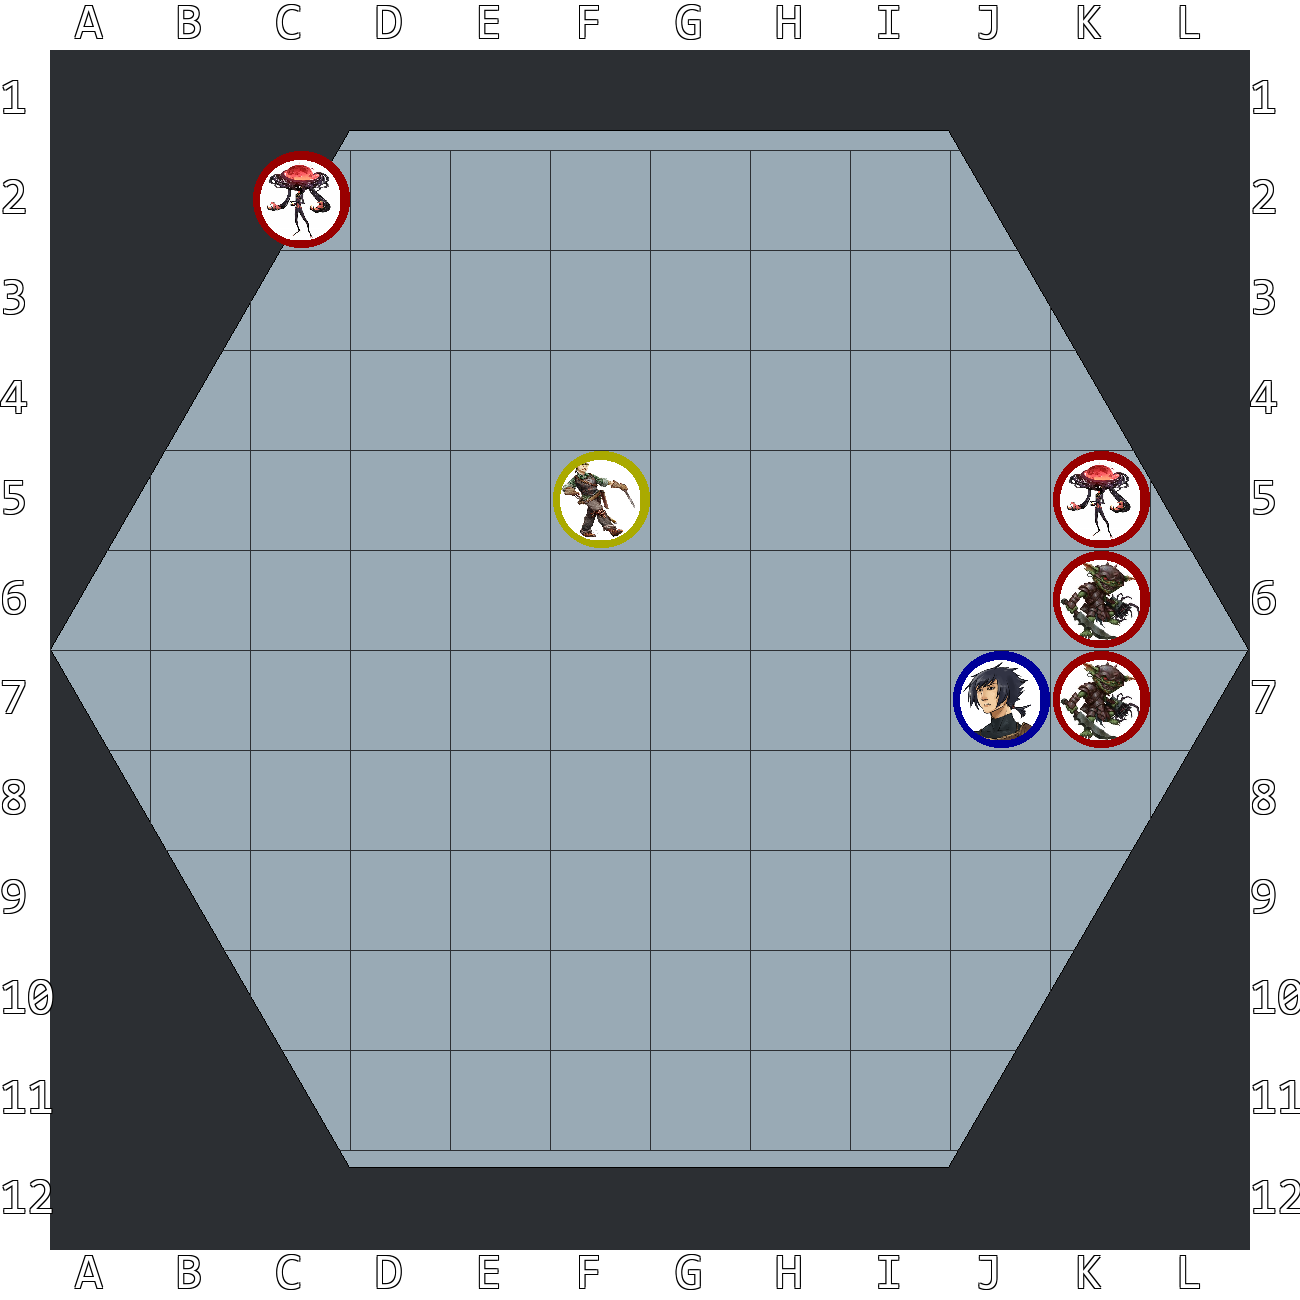

In [20]:
LabelGrid(GridFromArray(ReadSpreadsheet('Sheet1', spreadsheetID), HexagonImage()))

In [62]:
Move(1, 'G3', 'L6')

'Moved Subotai from G3 to L6.'

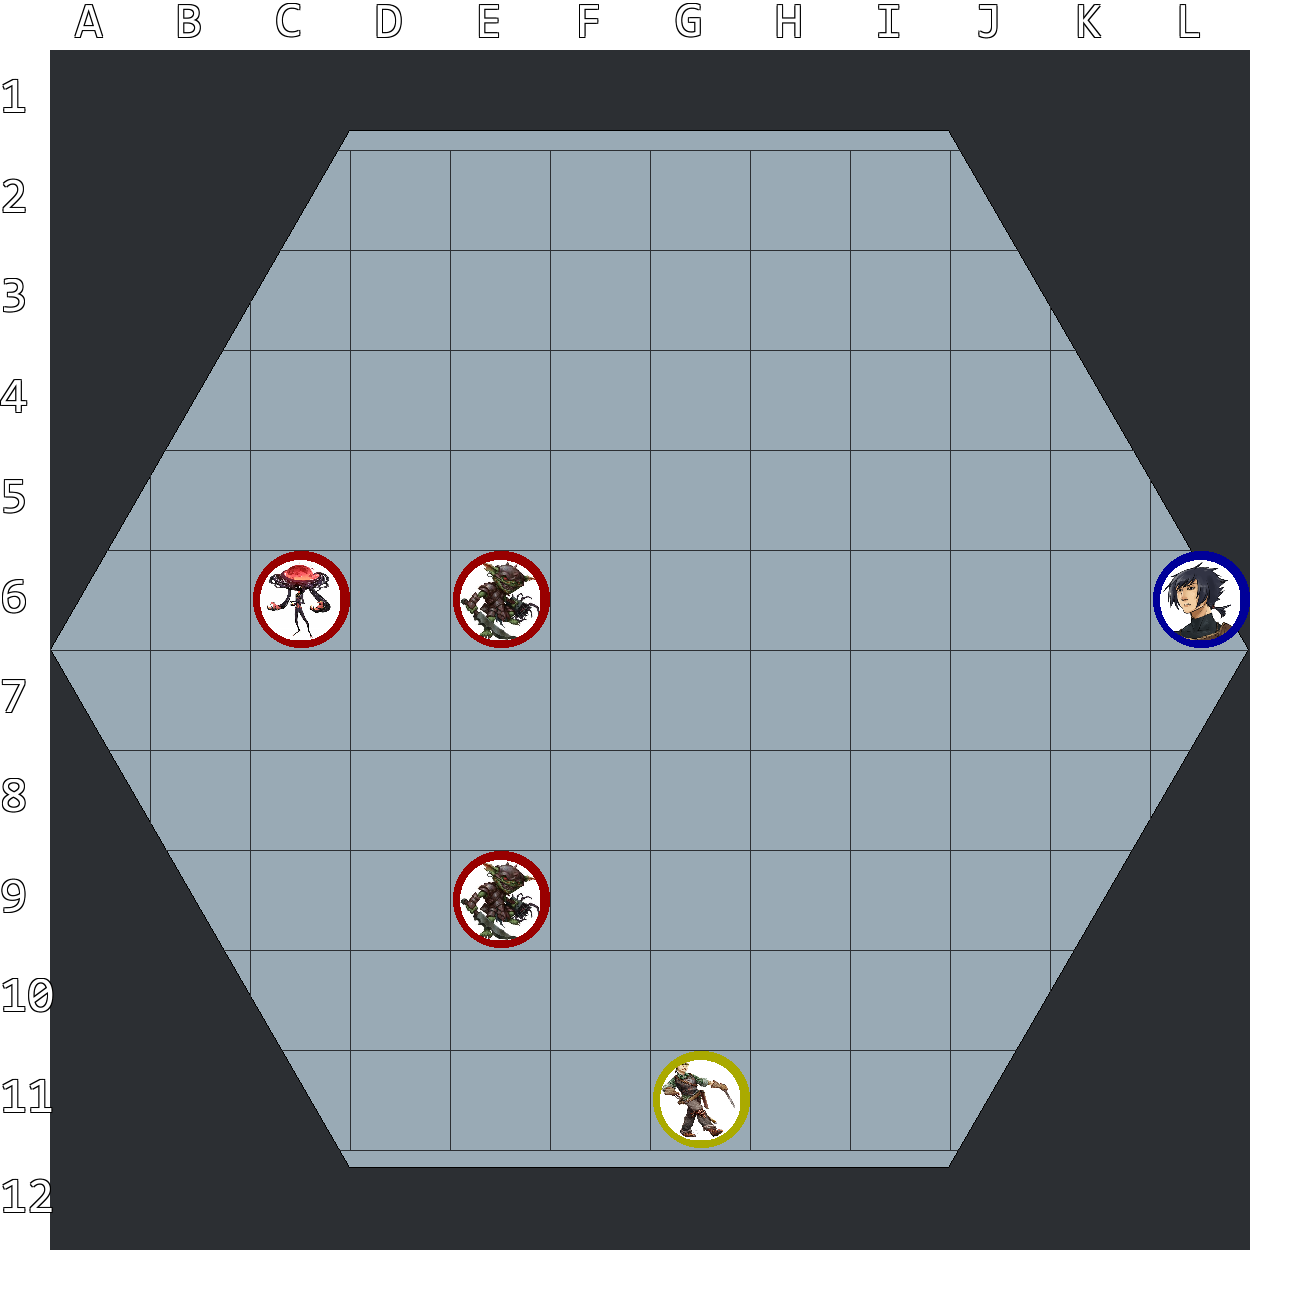

In [63]:
LabelGrid(GridFromArray(ReadSpreadsheet('Sheet1'), HexagonImage()))